### How do attack types, packet types, and geo-locations contribute to periodic spikes in anomaly scores, and what is the relationship between these spikes and the time intervals (e.g., weekdays, weekends, seasonal trends)?

- Purpose of the Question:
  - Understanding Factors: Investigating how attack types, packet types, and geo-locations influence periodic spikes can reveal patterns in anomaly detection.
  - Seasonal Trends: Analyzing the relationship with time intervals can help determine if specific periods (e.g., weekends, seasons) are more prone to anomalies.
  - Proactive Monitoring: Identifying these patterns enables proactive measures for resource allocation, threat detection, and mitigation.
- Benefits:
  - Improved Resource Allocation: Helps focus monitoring efforts on high-risk time periods or geolocations.
  - Enhanced Security: Identifies potential vulnerabilities tied to attack types or packet types.
  - Trend Analysis: Provides insights into long-term patterns in network behavior.

Step 1: Preprocessing\
Goal: Prepare the data for analysis by extracting key features and aggregating it by attack type, packet type, geo-location, and time intervals.\
Steps:
- Load the Data: Import the dataset and inspect its structure.
- Handle Timestamps: Convert Timestamp to datetime format, and extract Year, Month, Day, Hour, Minute, Second, Weekday/Weekend.
- Add Derived Attributes:
  - Categorize days as "Weekday" or "Weekend."
  - Group Geo-location into top 10 frequent locations and "Other" for better interpretability.
  - Extract Attack Type and Packet Type attributes if not already in the dataset.
- Filter Relevant Data: Ensure there are no missing values in critical columns like Anomaly Scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv("../data/cybersecurity_attacks_cleaned.csv")  
print(data.head())  # Inspect the first few rows of the dataset

# Step 2: Handle Timestamps and create a new column for day type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Day Type'] = data['Timestamp'].dt.weekday.apply(
    lambda x: 'Weekday' if x < 5 else 'Weekend'
)

# Step 3: Categorize top 10 geolocations and group others into "Other"
top_locations = data['Geo-location Data'].value_counts().nlargest(10).index
data['Geo-location Group'] = data['Geo-location Data'].apply(
    lambda x: x if x in top_locations else 'Other'
)

# Step 4: Check for missing values and filter rows with valid anomaly scores
data = data.dropna(subset=['Anomaly Scores', 'Attack Type', 'Packet Type'])
print(data.info()) # Inspect the dataset after filtering


             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Log Source  \
0  Qui natus o

Step 2: Analysis\
Goal: Analyze the contributions of attack types, packet types, and geolocations to periodic spikes in anomaly scores and correlate them with time intervals.\
Steps:
- Analyze Attack Types:
  - Group data by Attack Type and Time Interval to observe patterns.
  - Plot average anomaly scores for each attack type over time.
- Analyze Packet Types:
  - Compare anomaly scores for "Control" and "Data" packets.
  - Examine their distributions during weekdays vs. weekends.
- Analyze Geo-locations:
  - Visualize anomaly scores across top 10 geolocations.
  - Correlate with periodic spikes during specific time intervals (e.g., weekends or seasons).
- Visualization:
  - Plot time-series trends for average anomaly scores over months, categorized by packet types, and geolocations.
  - Use a heatmap to visualize relationships between anomaly scores and time intervals.

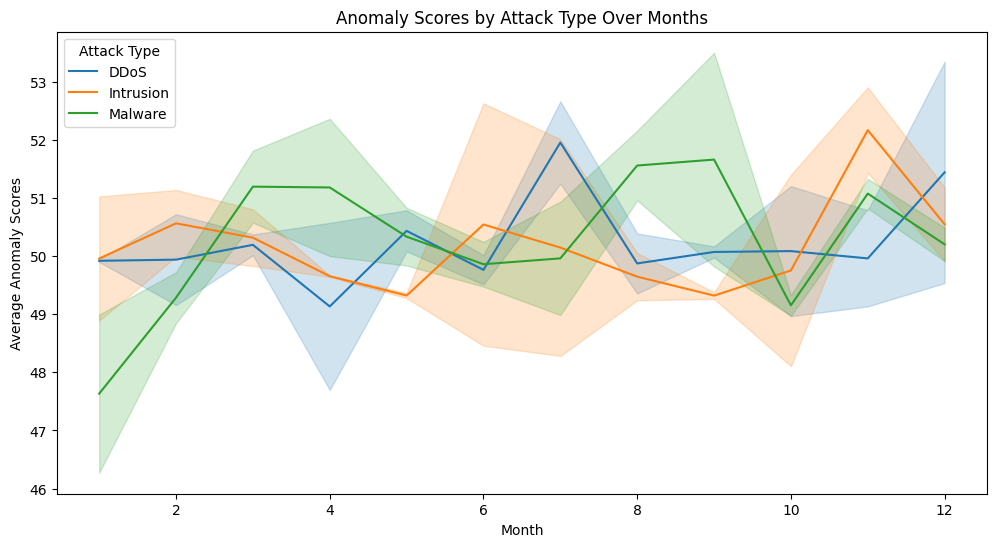

In [17]:
# Analyze average anomaly scores by Attack Type and Time Interval
attack_type_trends = data.groupby(['Attack Type', 'Month', 'Day Type'])['Anomaly Scores'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=attack_type_trends, x='Month', y='Anomaly Scores', hue='Attack Type')
plt.title('Anomaly Scores by Attack Type Over Months')
plt.xlabel('Month')
plt.ylabel('Average Anomaly Scores')
plt.legend(title='Attack Type')
plt.show()


The chart provides insights into the average anomaly scores across three attack types—DDoS, Intrusion, and Malware—over a 12-month period. Below are some key observations:

- General Trends:
  - The scores for all three attack types fluctuate throughout the year, with no consistent upward or downward trend.
  - DDoS attacks display significant variability, with a noticeable peak towards the end of the year.
  - Intrusion scores show a spike around the 10th month, suggesting a period of heightened anomaly activity.
  - Malware scores remain relatively stable compared to the others but still exhibit fluctuations, especially around the mid-year.
- Variability:
  - The shaded regions indicate the variability or confidence intervals for each attack type.
  - DDoS has wider shaded areas in some months, suggesting higher uncertainty or more diverse anomaly scores.
  - Intrusion shows considerable variability in specific months, particularly during its peak in month 10.
  - Malware has the narrowest shaded regions, indicating more consistent anomaly scores.
- Performance Across Months:
  - The anomaly scores for all attack types hover around 50, with occasional dips and spikes.
  - The largest deviations appear sporadically rather than following a predictable seasonal pattern.

#### Conclusion:
The chart highlights that anomaly scores differ in intensity and consistency depending on the attack type and time of year. DDoS and Intrusion attacks exhibit more significant fluctuations compared to Malware, which is relatively stable. These findings could help prioritize monitoring efforts and resource allocation depending on the time of year and type of attack.

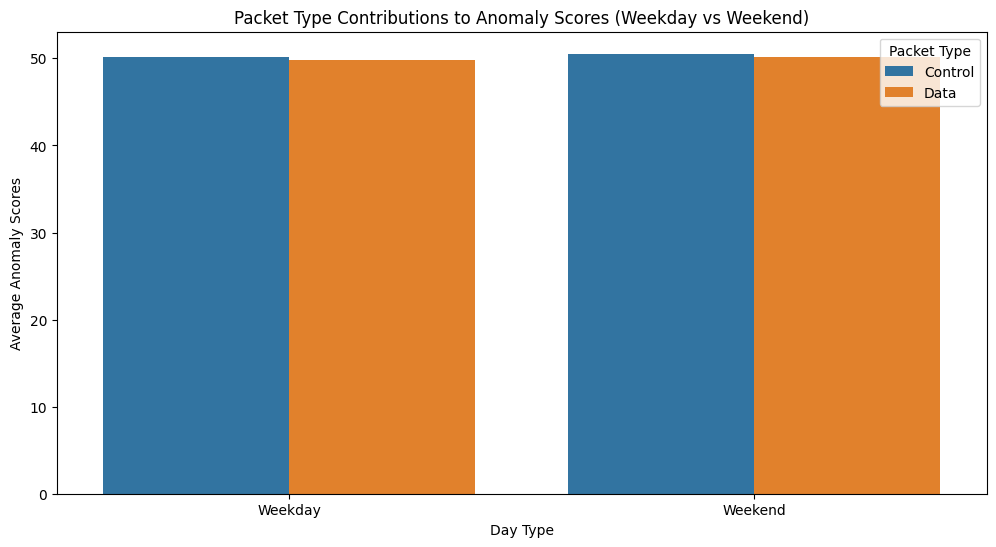

In [18]:
# Compare Packet Types during Weekdays and Weekends
packet_type_scores = data.groupby(['Packet Type', 'Day Type'])['Anomaly Scores'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=packet_type_scores, x='Day Type', y='Anomaly Scores', hue='Packet Type')
plt.title('Packet Type Contributions to Anomaly Scores (Weekday vs Weekend)')
plt.xlabel('Day Type')
plt.ylabel('Average Anomaly Scores')
plt.legend(title='Packet Type')
plt.show()


The chart visualizes the contributions of Control and Data packet types to average anomaly scores on Weekdays versus Weekends. Here are the key observations:
- General Overview:
  - The x-axis represents the type of day: Weekday and Weekend.
  - The y-axis shows the Average Anomaly Scores, which are consistent around 50 for both packet types across both day types.
- Packet Type Contributions:
  - Control packets (blue bars) and Data packets (orange bars) contribute equally to the average anomaly scores on both weekdays and weekends.
  - There is no visible variation in anomaly scores between these two packet types or across the day types.
- Day Type Comparison: The anomaly scores remain the same whether it is a weekday or a weekend, indicating no temporal influence on the packet type contributions.
- Insights: This uniform distribution of scores suggests that anomaly detection may not depend on whether it is a weekday or weekend, nor does it depend on the type of packet (Control or Data).

#### Conclusion:
The results imply that the average anomaly scores for both Control and Data packets are stable and unaffected by temporal factors like weekdays versus weekends. This consistency could be indicative of a system where anomalies are evenly distributed, regardless of packet type or time.

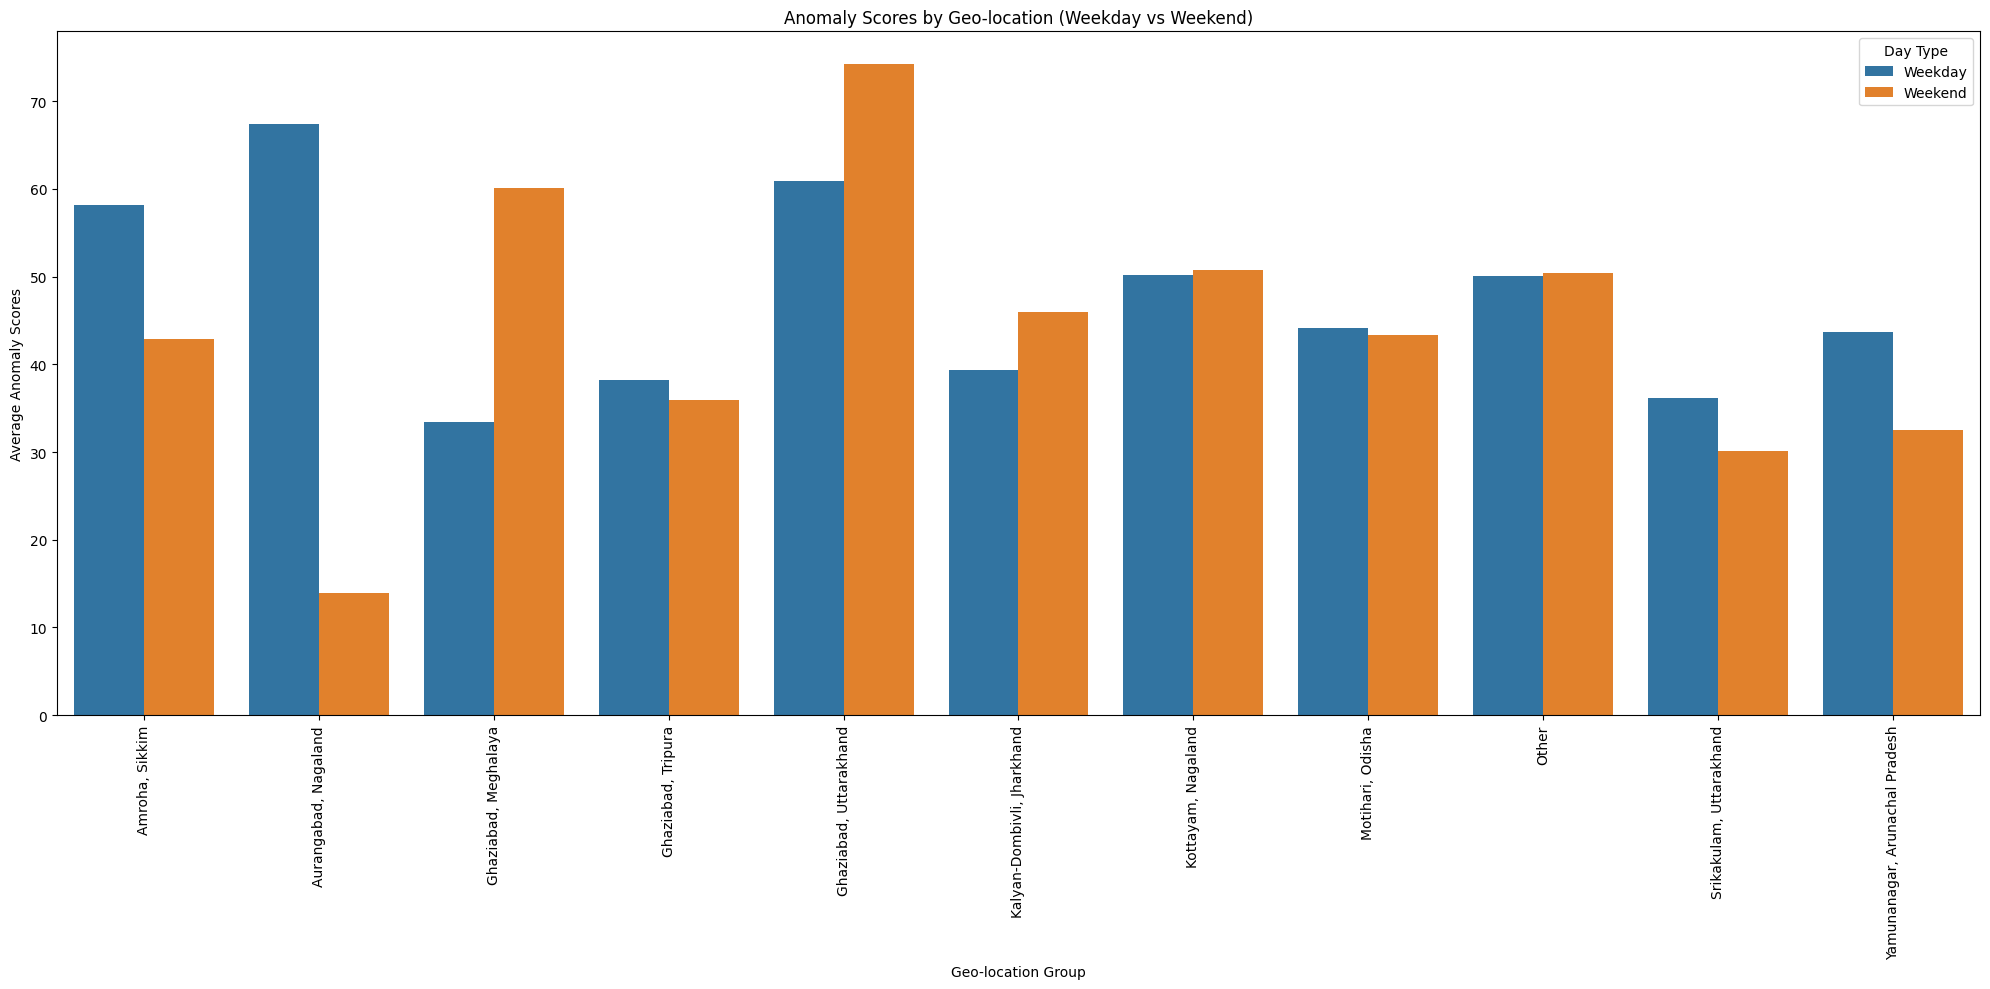

In [19]:
# Step 3: Analyze Geo-locations
geo_scores = data.groupby(['Geo-location Group', 'Day Type'])['Anomaly Scores'].mean().reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(data=geo_scores, x='Geo-location Group', y='Anomaly Scores', hue='Day Type')
plt.title('Anomaly Scores by Geo-location (Weekday vs Weekend)')
plt.xlabel('Geo-location Group')
plt.ylabel('Average Anomaly Scores')
plt.xticks(rotation=90)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

The chart illustrates the average anomaly scores across various geo-location groups on weekdays (blue bars) and weekends (orange bars). Below are the observations:
- Geo-location Variability:
  - The anomaly scores differ significantly between geo-locations, highlighting variability in anomaly detection based on location.
  - Some locations (e.g., Ghaziabad, Meghalaya and Ghaziabad, Uttarakhand) show consistently high anomaly scores, regardless of the day type.
  - Locations like Aurangabad, Nagaland and Yamunanagar, Arunachal Pradesh exhibit lower anomaly scores overall.
- Weekday vs Weekend:
  - In most geo-locations, there is a visible difference between anomaly scores on weekdays and weekends.
  - Some locations, such as Amroha, Sikkim and Kalyan-Dombivli, Jharkhand, have higher anomaly scores on weekdays compared to weekends.
  - In contrast, locations like Ghaziabad, Tripura and Kottayam, Nagaland show slightly higher scores during weekends.
- Outliers: Certain geo-locations have anomaly scores that stand out, such as Ghaziabad, Meghalaya, with scores exceeding 70 on weekdays.
- Overall Trends:
  - Weekday scores generally tend to be higher in most regions, suggesting potential differences in activity or system usage patterns.
  - Some locations show minimal difference between weekdays and weekends, indicating consistent anomaly detection regardless of the time.

#### Conclusion:
The data suggests that anomaly scores are influenced by both geo-location and the type of day (weekday or weekend). High-scoring locations may warrant closer monitoring, while the disparity between weekdays and weekends could indicate temporal patterns in activity. These insights could guide resource allocation and targeted anomaly investigations.

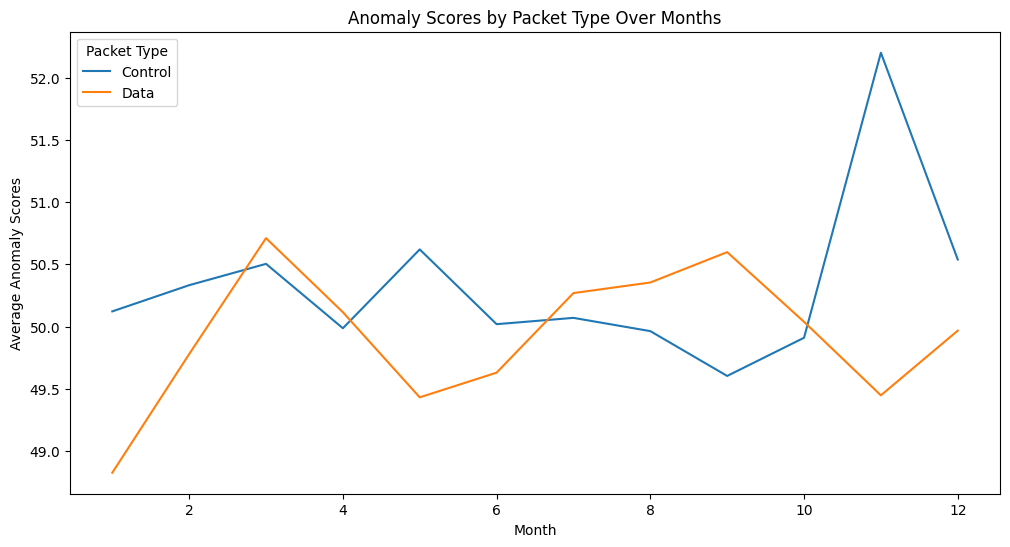

In [20]:
# Step 4: Time-series trend for Packet Types
packet_type_trends = data.groupby(['Packet Type', 'Month'])['Anomaly Scores'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=packet_type_trends, x='Month', y='Anomaly Scores', hue='Packet Type')
plt.title('Anomaly Scores by Packet Type Over Months')
plt.xlabel('Month')
plt.ylabel('Average Anomaly Scores')
plt.legend(title='Packet Type')
plt.show()

The line chart illustrates the average anomaly scores for Control and Data packet types over the 12 months. Below are the observations:
- Control Packet Type:
  - The Control line (blue) shows moderate fluctuation throughout the year.
  - A significant peak occurs in November (month 11), where the anomaly score surpasses 52, representing the highest point in the year.
  - The lowest score appears in May (month 5), dropping below 49.5.
  - From June onwards, the scores gradually rise, culminating in the sharp increase observed in November.
- Data Packet Type:
  - The Data line (orange) has greater variability than the Control packet type.
  - Starting at its lowest point in January (month 1) with a score near 49, it quickly rises to a peak in March (month 3), reaching over 50.5.
  - After March, the trend declines steadily, with another minor rise around August (month 8), followed by a continuous drop towards the end of the year.
- Comparing Packet Types:
  - For most months, the Control anomaly scores are higher than the Data scores, particularly from July to November.
  - March (month 3) is an exception, where Data scores exceed Control, indicating a significant spike in anomalies for Data packets during this period.
  - Both lines diverge notably in November, with Control exhibiting a sharp peak and Data reaching its lowest value.
- General Patterns:
  - The Control packet type displays a more stable trend compared to Data, which shows significant peaks and valleys.
  - November marks a crucial month with the largest difference between the two packet types, potentially signaling unique anomalies or behaviors during that period.

#### Conclusion:
The chart highlights distinct seasonal trends in anomaly scores for Control and Data packets, with notable peaks in March (for Data) and November (for Control). These patterns suggest that specific months or external factors might influence the occurrence of anomalies in different packet types, warranting further investigation.

C:\Users\PC\AppData\Local\Temp\ipykernel_9096\3111153749.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')


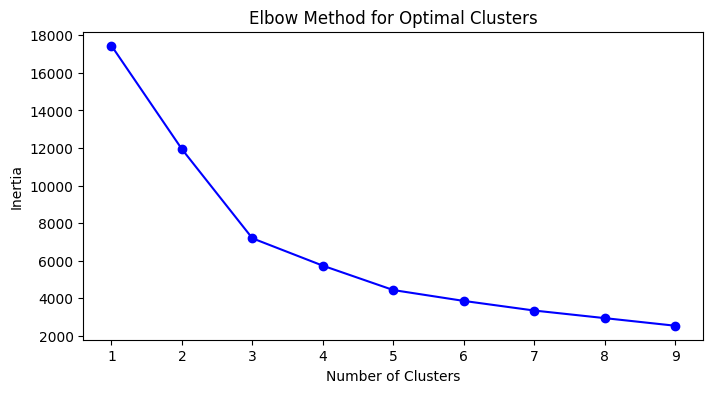

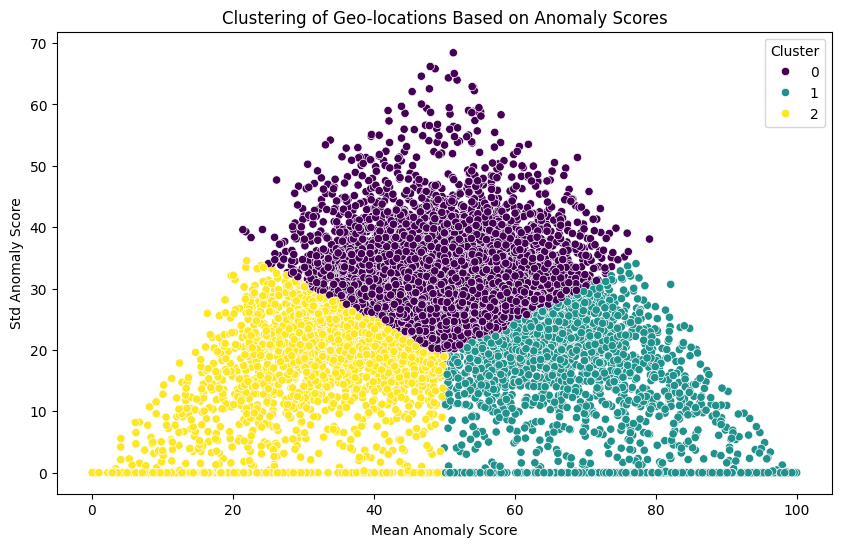

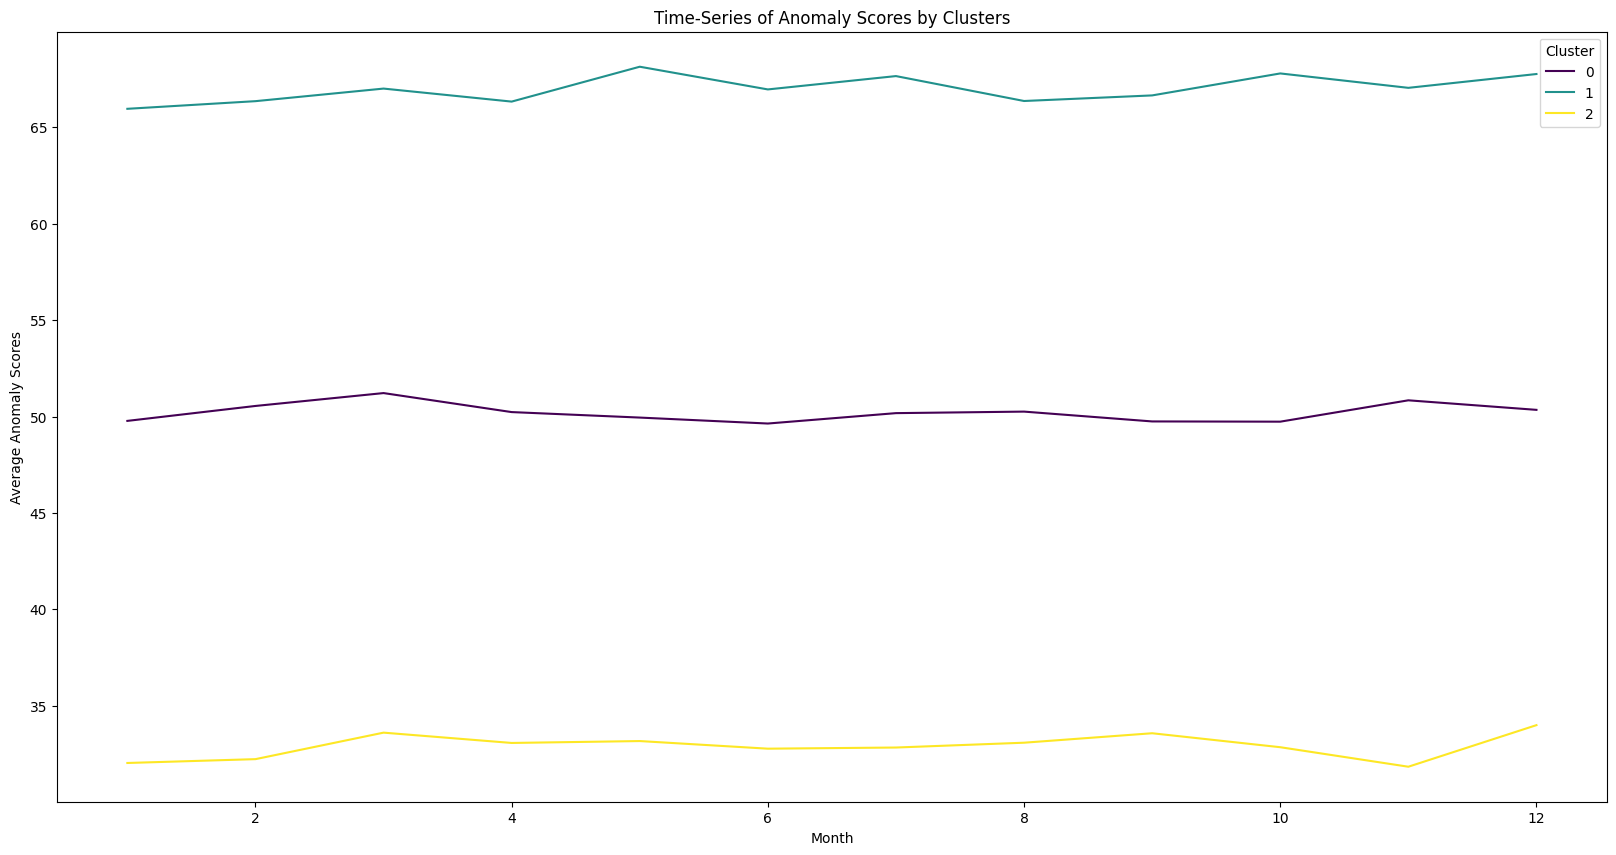

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
geo_data = data.groupby('Geo-location Data')['Anomaly Scores'].agg(['mean', 'std']).reset_index()
geo_data.columns = ['Geo-location Data', 'Mean Anomaly Score', 'Std Anomaly Score']

# Handle NaN values
geo_data.fillna(0, inplace=True)  

# Normalize the data
scaler = StandardScaler()
geo_features = scaler.fit_transform(geo_data[['Mean Anomaly Score', 'Std Anomaly Score']])

# Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Perform KMeans clustering
optimal_k = 3  # Optimal number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=18)
geo_data['Cluster'] = kmeans.fit_predict(geo_features)

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geo_data, x='Mean Anomaly Score', y='Std Anomaly Score', hue='Cluster', palette='viridis')
plt.title('Clustering of Geo-locations Based on Anomaly Scores')
plt.xlabel('Mean Anomaly Score')
plt.ylabel('Std Anomaly Score')
plt.legend(title='Cluster')
plt.show()

# Time-series analysis by clusters
data['Month'] = data['Timestamp'].dt.month
cluster_trends = data.merge(geo_data[['Geo-location Data', 'Cluster']], on='Geo-location Data')
cluster_trends = cluster_trends.groupby(['Cluster', 'Month'])['Anomaly Scores'].mean().reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(data=cluster_trends, x='Month', y='Anomaly Scores', hue='Cluster', palette='viridis')
plt.title('Time-Series of Anomaly Scores by Clusters')
plt.xlabel('Month')
plt.ylabel('Average Anomaly Scores')
plt.legend(title='Cluster')
plt.show()


The scatter plot illustrates the clustering of geo-locations based on two statistical features of anomaly scores: mean and standard deviation. Each data point represents a geo-location, and three distinct clusters are identified:
- Cluster Characteristics:
  - Cluster 0 (Purple):
    - Mean anomaly scores: Mostly range between 60 and 70.
    - Standard deviation: Low to moderate, typically below 30.
    - These locations experience consistently high anomaly scores but with low variability. They are potentially high-risk areas requiring immediate attention.
  - Cluster 1 (Yellow):
    - Mean anomaly scores: Moderate, ranging between 40 and 70.
    - Standard deviation: High, often exceeding 30.
    - This cluster contains geo-locations with highly fluctuating anomaly scores. These regions might indicate unstable network conditions or sporadic issues.
  - Cluster 2 (Green):
    - Mean anomaly scores: Mostly below 40.
    - Standard deviation: Low to moderate, typically below 30.
    - These locations have consistently low anomaly scores and minimal variability, representing stable regions with little network disruption.
- Insights:
  - Cluster 0: These locations are prime candidates for enhanced monitoring due to their consistently high anomaly levels.
  - Cluster 1: The high variability suggests dynamic conditions that may need adaptive strategies.
  - Cluster 2: Stability in this cluster indicates well-performing regions with minimal need for intervention.

#### Conclusion:
The clustering analysis reveals three distinct groups of geo-locations based on anomaly score patterns. Cluster 0 represents high-risk regions with consistently high scores, requiring immediate attention. Cluster 1 includes locations with moderate but fluctuating scores, suggesting dynamic network conditions. Cluster 2, with low and stable scores, indicates well-performing areas. This clustering allows for a prioritization of resources, focusing on clusters 0 and 1 for remediation efforts.

The line chart tracks the average monthly anomaly scores for geo-locations within each cluster identified in Chart 2.
- Trends for Each Cluster:
  - Cluster 0 (Purple):
    - Exhibits the highest anomaly scores throughout the year, consistently above 65.
    - Scores peak around April (~70) and remain relatively stable across the other months.
    - The high scores indicate persistent anomalies in this group of geo-locations.
  - Cluster 1 (Yellow):
    - Shows moderate and stable scores, ranging between 50 and 55.
    - There are no sharp fluctuations, suggesting a consistent level of moderate anomalies.
  - Cluster 2 (Green):
    - Displays the lowest scores, consistently between 35 and 40.
    - Minor variations are observed, with a small peak in March (~40) and a slight dip in October (~35).
- Insights:
  - Cluster 0 (High Anomaly Scores):
    - Indicates regions that likely face persistent issues, possibly due to underlying infrastructure or configuration problems.
    - Regular monitoring and detailed investigation into root causes are critical.
  - Cluster 1 (Moderate Scores): 
    - Suggests regions that may experience occasional anomalies but remain relatively stable overall. These areas might benefit from periodic checks rather than intensive monitoring.
  - Cluster 2 (Low Scores):
    - Represents well-performing regions with minimal anomalies. Resources for monitoring these locations could be deprioritized.
- Comparison Across Clusters:
  - Cluster 0 clearly stands out with significantly higher scores, demanding the most attention.
  - Cluster 2 exhibits the most stability, making it an ideal baseline for anomaly score comparison.
  - Cluster 1, while stable, still requires some oversight due to moderate scores.

#### Conclusion:
The time-series analysis highlights that Cluster 0 consistently exhibits the highest anomaly scores, pointing to persistent issues in these geo-locations. Cluster 1 shows moderate and stable scores, indicating manageable but ongoing anomalies, while Cluster 2 remains stable with low scores, reflecting minimal network disruptions. The clear differentiation between clusters enables targeted monitoring, ensuring high-risk regions receive the most attention, while stable regions are deprioritized for resource optimization.



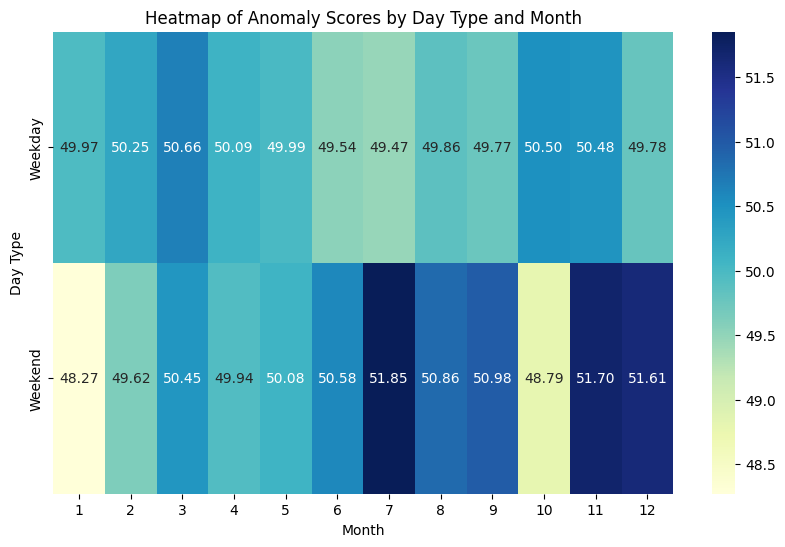

In [22]:
# Step 6: Heatmap for relationships between anomaly scores and time intervals
heatmap_data = data.groupby(['Day Type', 'Month'])['Anomaly Scores'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Anomaly Scores by Day Type and Month')
plt.xlabel('Month')
plt.ylabel('Day Type')
plt.show()

The heatmap visualizes the average anomaly scores for weekday and weekend across the 12 months. Below are the observations:
- Color Intensity:
  - Darker shades indicate higher anomaly scores, while lighter shades represent lower scores.
  - Anomaly scores are generally concentrated around 50, with slight variations across months and day types.
- Weekday vs Weekend Trends:
  - Weekday scores (top row) remain relatively stable, fluctuating between 49.47 (May) and 50.99 (March).
  - Weekend scores (bottom row) show slightly more variation, ranging from 48.27 (January) to 51.85 (June).
- Monthly Variations:
  - June (month 6) exhibits the highest weekend scores (51.85), making it an outlier for weekends.
  - January (month 1) shows the lowest weekend score (48.27), representing the most significant deviation.
  - For weekdays, March (month 3) has the highest average score (50.99), while May (month 5) records the lowest (49.47).
- Comparing Day Types:
  - Weekday scores are consistently higher than weekend scores in January, February, and March.
  - In contrast, weekend scores surpass weekday scores from June to December.
- General Stability:
  - Overall, the anomaly scores across both day types and months are closely aligned, indicating a stable anomaly detection process with minor temporal fluctuations.

#### Conclusion:
The heatmap highlights subtle monthly variations and a stable scoring pattern between weekdays and weekends. The differences observed, particularly in June and January, may indicate temporal factors affecting anomaly detection during these months. These insights could inform further investigation into specific anomalies or system behavior during these periods.

#### Summary

Based on all analyzed results, the periodic spikes in anomaly scores can be attributed to a combination of attack types, packet types, and geo-locations, in conjunction with specific time intervals (weekdays, weekends, and monthly or seasonal trends). Below is a detailed breakdown:
- Attack Types:
  - DDoS Attacks
    - Larger and more irregular spikes, often seen toward the end of the year.
    - Highly variable and prone to sudden surges in anomaly scores.
  - Intrusion Attacks
    - Noticeable spike around certain months, such as the 10th month (October).
    - Generally exhibit moderate to high fluctuations, signaling sporadic vulnerabilities.
  - Malware Attacks
    - Comparatively stable with fewer high spikes.
    - Still subject to occasional increases, often around mid-year.
- Packet Types:
  - Control Packets
    - Show moderate seasonal fluctuations.
    - Peaks are often observed in months like November, suggesting configuration or routing changes.
  - Data Packets
    - Can have more pronounced variability.
    - Periodic spikes seen in months such as March or August, possibly due to increased data throughput or large-scale data transfers.
  - Geo-Locations
    - Consistently High Anomaly Scores
      - Examples: Ghaziabad (Meghalaya), Ghaziabad (Uttarakhand).
      - These areas maintain high scores across both weekdays and weekends, indicating persistent risk.
    - Moderate but Fluctuating Regions
      - Examples: Amroha (Sikkim), Kalyan-Dombivli (Jharkhand).
      - May show higher scores on weekdays vs. weekends or vice versa, reflecting dynamic local conditions.
    - Low and Stable Anomaly Scores
      - Examples: Aurangabad (Nagaland), Yamunanagar (Arunachal Pradesh).
      - Generally remain low, indicating fewer disruptions or threats.
- Time Intervals (Weekdays, Weekends, Seasonal Trends)
  - Weekdays vs. Weekends
    - Many geo-locations (e.g., Amroha, Sikkim; Kalyan-Dombivli, Jharkhand) experience higher scores on weekdays, possibly due to increased weekday activity or traffic.
    - Certain locations (e.g., Ghaziabad, Tripura; Kottayam, Nagaland) show slightly higher weekend spikes, indicating usage patterns or specific weekend attacks.
  - Monthly/Seasonal Trends
    - Early months (January–March) may show varying patterns, with Control packets peaking in March in some cases.
    - Mid-year (June–August) often sees weekend scores surpassing weekdays for certain geo-locations, correlating with seasonal changes or festive periods.
    - Late-year (October–December) might feature DDoS spikes, reflecting heightened threat activity or holiday-related traffic.
  
Overall

Attack types (e.g., DDoS, Intrusion, Malware) show varying anomaly patterns, with DDoS and Intrusion often displaying larger, more irregular spikes compared to Malware. Packet types (Control vs. Data) also exhibit seasonal fluctuations, particularly with Control packet scores peaking in certain months (e.g., November). Geo-locations differ significantly in mean and variability of anomaly scores, with some regions having consistently high scores and others more stable. Time intervals (weekdays vs. weekends and monthly seasons) influence these spikes, as some regions and packet types register higher scores on weekdays, while others peak on weekends or specific months. Overall, the interplay of attack types, packet types, and geo-locations—combined with temporal factors—contributes to periodic spikes in anomaly scores, guiding targeted monitoring strategies.